<a href="https://colab.research.google.com/github/tommyn099/python/blob/main/Investment_Company_Analysis_Tommy_Nainggolan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##OBJECTIVE
to make 50% of current active app users use government bond investment product during the campaign period with targeted campaigns event through customer segmentation.

#LIBRARY

In [ ]:
import numpy as np # for agregation
import pandas as pd # for data frame
import matplotlib.pyplot as plt #for EDA
import seaborn as sns # for EDA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster #for cluster
from yellowbrick.cluster import SilhouetteVisualizer #for cluster
from datetime import datetime # for date time
from datetime import timedelta #for timedelta 

#RAW DATA
Import from google drive in .CSV format

In [ ]:
#USERS.CSV
#define a variable name (to your liking) and assign the link with single quote.
potter_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view'

#next we define a variable 'potter' with the trick
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2] #we use this trick to get the id of the file

#then we read the potter variable using pandas function .read_csv whilst also assigning them to new variable called

df_users = pd.read_csv(potter)
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [ ]:
#DAILY_USER_BALANCE_SEP21.CSV
#define a variable name (to your liking) and assign the link with single quote.
potter_daily_url = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view'

#next we define a variable 'potter' with the trick
potter_daily = 'https://drive.google.com/uc?id='+ potter_daily_url.split('/')[-2] #we use this trick to get the id of the file

#then we read the potter variable using pandas function .read_csv whilst also assigning them to new variable called

df_daily = pd.read_csv(potter_daily)
df_daily

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


#**DATA CLEANING**


##a. df_daily Data Set
Cleaning date

In [ ]:
#ubah data_type date dari sting ke datetime
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily.info()
#date sudah dalam datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

###Daily Sum
Melihat data transaksi harian

In [ ]:
df_day= df_daily


In [ ]:
df_day.fillna(0, axis=0, inplace=True)

In [ ]:
df_day

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0


In [ ]:
df_day['Total_AUM']= df_day['Saham_AUM']+ df_day['Pasar_Uang_AUM'] + df_day['Pendapatan_Tetap_AUM'] + df_day['Campuran_AUM']
df_day

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,10132277.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,9956556.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,9914858.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,10016360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0


In [ ]:
df_day_sum = df_day.groupby(df_day['date']).sum()
df_day_sum

,user_id,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM
date,,,,,,,,,,,,,,
2021-08-04,397084269,2.063762e+07,2.049000e+07,0.0,1.239370e+07,1.239003e+07,0.0,1.029717e+07,1.027830e+07,0.0,1.114070e+07,1.100000e+07,0.0,5.446918e+07
2021-08-05,700339011,3.226744e+07,3.195660e+07,1430000.0,3.029522e+07,3.028503e+07,2030000.0,4.425291e+07,4.422437e+07,10410000.0,2.240911e+07,2.230000e+07,0.0,1.292247e+08
2021-08-06,1094785912,5.458319e+07,5.435060e+07,3410000.0,8.525646e+07,8.522614e+07,1475000.0,1.004619e+08,1.004562e+08,5870070.0,4.844994e+07,4.690000e+07,9000000.0,2.887515e+08
2021-08-09,1473806602,7.969968e+07,8.080949e+07,-1311108.0,2.418925e+08,2.419338e+08,-44750000.0,1.346829e+08,1.347132e+08,3721976.0,8.798171e+07,8.600000e+07,25500000.0,5.442568e+08
2021-08-10,2007122724,9.598749e+07,9.758949e+07,4459994.0,9.059726e+07,9.054550e+07,-172287285.0,1.705993e+08,1.705992e+08,4300000.0,1.310054e+08,1.322000e+08,100000.0,4.881894e+08
2021-08-11,3427389807,2.309407e+08,2.316865e+08,18365006.0,4.473488e+08,4.472541e+08,260445127.0,7.163308e+08,7.161998e+08,5430030.0,6.047047e+08,6.160428e+08,2500000.0,1.999325e+09
2021-08-12,3427389807,2.302781e+08,2.289720e+08,-2714538.0,4.424841e+08,4.422875e+08,-4966640.0,7.106463e+08,7.105495e+08,-5650326.0,6.062125e+08,6.160428e+08,0.0,1.989621e+09
2021-08-13,3867398354,2.788296e+08,2.765650e+08,24018000.0,5.536786e+08,5.533848e+08,90855285.0,1.008808e+09,1.008954e+09,261164970.0,6.860631e+08,7.011428e+08,20000000.0,2.527380e+09
2021-08-16,4699461128,3.383378e+08,3.374793e+08,13253028.0,5.992457e+08,5.987589e+08,12020135.0,1.544018e+09,1.543272e+09,409974390.0,7.317335e+08,7.632428e+08,8100000.0,3.213335e+09


###Transform df_daily to user level information
To make segmentation of the customer, we need to make a variable that can be analyze into user level information. Since I'm analyzing the daily data of September, I'm gonna make it into end-of-period value, with the latest date of September as the treshold.
Things that going to be extracted :
1. end-of-period AUM
2. end-of-period Invested amount
3. total-buy in September
4. total-sell in September
5. nett in September


###Check duplicate
Duplicate is determined based on user_id

In [ ]:
# TRANSFOR df_daily TO USER LEVEL INFORMATION
# end period of AUM
# Cek seberapa banyak user_id pada data transaksi harian bulan semptember
df_daily['user_id'].nunique()
#number of unique value and row are same, so no duplicate

8277

###End period dari AUM dan Invested Amount

In [ ]:
#filter df_daily dengan data akhir periode (31 Agustus 2021 dan 30 September 2021) untuk mengambil nilai end period dari AUM dan Invested Amount
df_daily_end = df_daily[(df_daily['date']=='2021-09-30')|(df_daily['date']=='2021-8-31') ]
df_daily_end

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0
24,50961,2021-08-31,716057.0,700000.0,0.0,100049.0,100000.0,0.0,200117.0,200000.0,0.0,0.0,0.0,0.0,1016223.0
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,0.0,0.0,0.0,0.0,100911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0


In [ ]:
df_daily_end['date'].value_counts()

2021-09-30    8277
2021-08-31    3075
Name: date, dtype: int64

####Handle null value

In [ ]:
#cek apakah jumlah unique value dari user_id sebelum dan sesudah sama untuk memastikan data tanggal 30 September 2021 ada pada setiap id
#replace null value as 0 since it indicate no value/ no transaction at that time
df_daily_end.fillna(0, axis=0, inplace=True)
df_daily_end['user_id'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


50701      2
3835605    2
3812496    2
3812507    2
3812603    2
          ..
3944154    1
3944086    1
3944049    1
3943960    1
4165830    1
Name: user_id, Length: 8277, dtype: int64

In [ ]:
# cari nilai end-of-period AUM dan end-of-period Invested amount
df_daily_end['AUM_end_value'] = df_daily_end['Saham_AUM']+ df_daily_end['Pasar_Uang_AUM'] + df_daily_end['Pendapatan_Tetap_AUM'] + df_daily_end['Campuran_AUM']
df_daily_end['invested_amount_end_value'] = df_daily_end['Saham_invested_amount']+ df_daily_end['Pasar_Uang_invested_amount'] + df_daily_end['Pendapatan_Tetap_invested_amount'] + df_daily_end['Campuran_AUM']
df_daily_end

<ipython-input-14-1d2e4c7ec475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_end['AUM_end_value'] = df_daily_end['Saham_AUM']+ df_daily_end['Pasar_Uang_AUM'] + df_daily_end['Pendapatan_Tetap_AUM'] + df_daily_end['Campuran_AUM']
<ipython-input-14-1d2e4c7ec475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_end['invested_amount_end_value'] = df_daily_end['Saham_invested_amount']+ df_daily_end['Pasar_Uang_invested_amount'] + df_daily_end['Pendapatan_Tetap_invested_amount'] + df_daily_en

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0,10206945.0,10206945.0
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,9943587.0,9943587.0
24,50961,2021-08-31,716057.0,700000.0,0.0,100049.0,100000.0,0.0,200117.0,200000.0,0.0,0.0,0.0,0.0,1016223.0,1016223.0,1000000.0
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4163510.0,4100000.0
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,0.0,0.0,0.0,0.0,100911.0,100911.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10001.0,10000.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,101495.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,9987.0,10000.0


In [ ]:
#Let's Remove the unnecesarry column
df_end_period_value = df_daily_end
df_end_period_value

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0,10206945.0,10206945.0
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,9943587.0,9943587.0
24,50961,2021-08-31,716057.0,700000.0,0.0,100049.0,100000.0,0.0,200117.0,200000.0,0.0,0.0,0.0,0.0,1016223.0,1016223.0,1000000.0
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4163510.0,4100000.0
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,0.0,0.0,0.0,0.0,100911.0,100911.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10001.0,10000.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,101495.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,9987.0,10000.0


####Remove Outlier

In [ ]:
#Outlier akan di handle dengan meremove nilai 0 dari data terkait
AUM_Outlier = df_end_period_value.drop(columns=['invested_amount_end_value'], inplace =False)
AUM_Outlier = AUM_Outlier[(AUM_Outlier['AUM_end_value']>0) & (AUM_Outlier['date'] == '2021-09-30')]
AUM_Outlier

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,9943587.0
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4163510.0
74,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,103315.0
99,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,12049049.0,12049049.0
155,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0,409067.0,409067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,175081.0,175081.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10001.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,101495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,9987.0


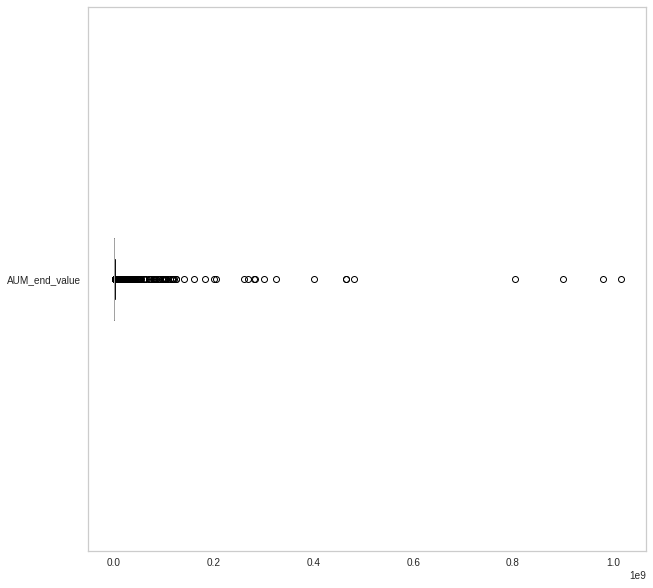

In [ ]:
AUM_Outlier.boxplot(column=['AUM_end_value'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

#Show Chart
plt.show()

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = AUM_Outlier['AUM_end_value'].quantile(0.25)
Q3 = AUM_Outlier['AUM_end_value'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 100604.0

Q3:
 990742.75

IQR:
 890138.75

Min:
 -1234604.125

Max:
 2325950.875


In [ ]:
filter_price_min = AUM_Outlier['AUM_end_value']<boxplot_min
filter_price_max = AUM_Outlier['AUM_end_value']>boxplot_max

# Filter data yang price-nya di bawah boxplot_min atau di atas boxplot_max
# Cara bikin kondisinya: BUKAN (filter_price_min ATAU filter_price_max)
# Cara bikin kondisinya: ~ (filter_price_min | filter_price_max)

# Cari yang tidak memenuhi kondisi
# filter_price_min | filter_price_max

df_non_outlier = AUM_Outlier[~
    (filter_price_min|filter_price_max)
    ]

df_non_outlier

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value
74,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,103315.0
155,66145,2021-09-30,249327.0,240000.0,0.0,29992.0,30000.0,0.0,129748.0,130000.0,0.0,0.0,0.0,0.0,409067.0,409067.0
174,67251,2021-09-30,584731.0,570000.0,0.0,110195.0,110000.0,0.0,419238.0,420000.0,0.0,0.0,0.0,0.0,1114164.0,1114164.0
188,70568,2021-09-30,61880.0,60000.0,0.0,10024.0,10000.0,0.0,129828.0,130000.0,0.0,0.0,0.0,0.0,201732.0,201732.0
238,72676,2021-09-30,61707.0,59853.0,0.0,110121.0,110000.0,0.0,80092.0,80000.0,0.0,0.0,0.0,0.0,251920.0,251920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,175081.0,175081.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10001.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,101495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,9987.0


Jika dilakukan remove outlier seperti diatas akan didapatkan data terakhir sebesar 5400 rows dari row awal sebesar 6214, dan jumlah ini sudah melebihi 30% dari data. Karena ini juga merupakan data uang sehingga memungkinkan orang-orang memiliki nilai yang sangat beragam, oleh karena itu data ini akan dilanjutkan untuk analisis

###Total Nett, Buy, and Sell in September

####Handle null value

In [ ]:
df_daily

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,10132277.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,9956556.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,9914858.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,10016360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0


In [ ]:
#Sum all the transaction but first handle the null value
df_daily_copy = df_daily.copy()
df_daily_copy.fillna(0, axis=0, inplace=True)
df_daily_copy['transaction_sum'] = df_daily_copy['Saham_transaction_amount']+ df_daily_copy['Pasar_Uang_transaction_amount'] + df_daily_copy['Pendapatan_Tetap_transaction_amount'] + df_daily_copy['Campuran_transaction_amount']
df_daily_copy

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,transaction_sum
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0,10132277.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0,10206945.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0,9956556.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0,9914858.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0,10016360.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,0.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,0.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,0.0


In [ ]:
df_buy = df_daily_copy[df_daily_copy['transaction_sum']>0]
df_sell = df_daily_copy[df_daily_copy['transaction_sum']<0]

In [ ]:
#Do agreggation in each month to make total amount in September
df_nett_month = df_daily_copy['transaction_sum'].groupby(df_daily_copy['user_id']).sum().reset_index()
df_nett_month = df_nett_month.rename(columns ={'transaction_sum': 'nett_month'})
df_buy_month = df_buy['transaction_sum'].groupby(df_buy['user_id']).sum().reset_index()
df_buy_month = df_buy_month.rename(columns ={'transaction_sum': 'buy_month'})
df_sell_month = df_sell['transaction_sum'].groupby(df_sell['user_id']).sum().reset_index()
df_sell_month = df_sell_month.rename(columns ={'transaction_sum': 'sell_month'})
df_nett_month

,user_id,nett_month
0,50701,0.0
1,50961,3100000.0
2,53759,0.0
3,54759,2000000.0
4,61414,-10000.0
...,...,...
8272,4165020,0.0
8273,4165132,0.0
8274,4165630,0.0
8275,4165704,0.0


In [ ]:
#gabungkan sell dan buy bersama dengan nett
#nett dan buy
df_month_trans = df_nett_month.merge(df_buy_month, how = 'left',left_on = 'user_id', right_on = 'user_id')
df_month_trans = df_month_trans.merge(df_sell_month, how= 'left', left_on ='user_id', right_on= 'user_id' )
df_month_trans.fillna(0, inplace= True)
df_month_trans

,user_id,nett_month,buy_month,sell_month
0,50701,0.0,0.0,0.0
1,50961,3100000.0,3100000.0,0.0
2,53759,0.0,0.0,0.0
3,54759,2000000.0,2000000.0,0.0
4,61414,-10000.0,0.0,-10000.0
...,...,...,...,...
8272,4165020,0.0,0.0,0.0
8273,4165132,0.0,0.0,0.0
8274,4165630,0.0,0.0,0.0
8275,4165704,0.0,0.0,0.0


In [ ]:
#gabungkan sell dan buy bersama dengan nett
#nett dan buy
df_month_trans = df_nett_month.merge(df_buy_month, how = 'left',left_on = 'user_id', right_on = 'user_id')
df_month_trans = df_month_trans.merge(df_sell_month, how= 'left', left_on ='user_id', right_on= 'user_id' )
df_month_trans.fillna(0, inplace= True)
df_month_trans

,user_id,nett_month,buy_month,sell_month
0,50701,0.0,0.0,0.0
1,50961,3100000.0,3100000.0,0.0
2,53759,0.0,0.0,0.0
3,54759,2000000.0,2000000.0,0.0
4,61414,-10000.0,0.0,-10000.0
...,...,...,...,...
8272,4165020,0.0,0.0,0.0
8273,4165132,0.0,0.0,0.0
8274,4165630,0.0,0.0,0.0
8275,4165704,0.0,0.0,0.0


###Merge end-period-value table with transaction table

In [ ]:
df_daily_user = df_month_trans.merge(df_end_period_value, how= 'left', left_on = 'user_id', right_on='user_id' )
df_daily_user = df_daily_user[df_daily_user['date']=='2021-09-30'] #untuk bulan september
df_daily_user

,user_id,nett_month,buy_month,sell_month,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
1,50701,0.0,0.0,0.0,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,9943587.0,9943587.0
3,50961,3100000.0,3100000.0,0.0,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4163510.0,4100000.0
5,53759,0.0,0.0,0.0,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,103315.0,100000.0
7,54759,2000000.0,2000000.0,0.0,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,12049049.0,12049049.0,12000000.0
9,61414,-10000.0,0.0,-10000.0,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,0.0,0.0,0.0,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11348,4165132,0.0,0.0,0.0,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10001.0,10001.0,10000.0
11349,4165630,0.0,0.0,0.0,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0,101495.0,101495.0,100000.0
11350,4165704,0.0,0.0,0.0,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,9987.0,9987.0,10000.0


In [ ]:
df_daily_user.describe()

,user_id,nett_month,buy_month,sell_month,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
count,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03
mean,3.668493e+06,1.204918e+06,1.492791e+06,-2.878725e+05,3.473692e+05,3.364478e+05,1.039720e+04,7.856005e+05,7.833485e+05,5.322746e+04,1.263754e+06,1.260824e+06,2.037673e+04,1.836633e+05,1.895738e+05,1.642987e+03,2.580387e+06,2.580387e+06,2.564284e+06
std,7.762784e+05,1.678320e+07,1.715047e+07,3.564948e+06,2.101070e+06,2.034382e+06,1.653912e+05,1.361804e+07,1.357219e+07,1.581971e+06,1.847532e+07,1.836689e+07,6.917667e+05,3.748921e+06,3.937860e+06,1.187133e+05,2.546499e+07,2.546499e+07,2.534350e+07
min,5.070100e+04,-8.075000e+07,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,-5.000000e+06,0.000000e+00,0.000000e+00,-2.283012e+06,0.000000e+00,0.000000e+00,-3.000000e+07,0.000000e+00,0.000000e+00,-2.500000e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.778420e+06,0.000000e+00,0.000000e+00,-1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.180000e+02,1.180000e+02,0.000000e+00
50%,3.905988e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.001600e+04,1.000000e+04,0.000000e+00,9.966000e+03,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.019800e+05,1.019800e+05,1.000000e+05
75%,4.020965e+06,1.000000e+05,1.500000e+05,0.000000e+00,1.030030e+05,1.000000e+05,0.000000e+00,1.001320e+05,1.000000e+05,0.000000e+00,1.096230e+05,1.100000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.038080e+05,5.038080e+05,5.000000e+05
max,4.165830e+06,7.990008e+08,7.995000e+08,0.000000e+00,6.445433e+07,6.184000e+07,6.980000e+06,1.016171e+09,1.012200e+09,1.000000e+08,9.797670e+08,9.700000e+08,2.500000e+07,2.827965e+08,3.000000e+08,1.000000e+07,1.016171e+09,1.016171e+09,1.012200e+09


In [ ]:
{'BUY_Count' : df_daily_user['buy_month'][df_daily_user['buy_month']>0].count(), 
 'Sell_Count' : df_daily_user['sell_month'][df_daily_user['sell_month']<0].count(), 
 'No_Trans': df_daily_user['nett_month'][df_daily_user['nett_month']==0].count()
 }

{'BUY_Count': 3494, 'Sell_Count': 2478, 'No_Trans': 3532}

###Insight
From the descriptive parameter, there're some points that we can notice:
1. The avarenge buy of a user in September is 1.49 M meanwhile the sell is 0,28 M, we could say that our user tend to buy more rather than sell
2. Our user have the AUM avarange value on 2.58 M while the mean of invested amount is 2.56 M, this mean that our use in general have profit
3. Most of our user (75%) have their cash in investment
4. 57% user doing buy in nett total month, and 30% doing sell


##b. df_users Data Set

###Handling missing value & null value

In [ ]:
#Check Data Type
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
#action :
#There are no missing value (number of all row of each column are same) except in referral_code_used column, we can assume that null value mean no referal, so we will replace with 'no_referral'
df_users.fillna('no_refferal', inplace =True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
#then we have to change user registration date into date time type
df_users['registration_import_datetime']= pd.to_datetime(df_users['registration_import_datetime'])
df_users['registration_import_datetime']

0       2021-09-17 14:10:44
1       2021-10-09 11:11:34
2       2021-10-08 01:27:30
3       2021-08-12 07:19:32
4       2021-08-15 09:31:24
                ...        
14707   2021-10-17 15:57:23
14708   2021-10-15 12:44:05
14709   2021-10-11 10:06:15
14710   2021-10-21 13:42:20
14711   2021-10-22 00:55:26
Name: registration_import_datetime, Length: 14712, dtype: datetime64[ns]

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


In [ ]:
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no_refferal,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no_refferal,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no_refferal,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Gaji


###Check typos in string column

In [ ]:
# check unique value in user_gender column
df_users['user_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# check unique value in user_occupation column
df_users['user_occupation'].unique()

array(['Swasta', 'Others', 'IRT', 'PNS', 'Pengusaha', 'Pensiunan',
       'TNI/Polisi', 'Guru', 'Pelajar'], dtype=object)

In [ ]:
# check unique value in user_income_range column
df_users['user_income_range'].unique().tolist()

['> Rp 500 Juta - 1 Miliar',
 '> Rp 50 Juta - 100 Juta',
 'Rp 10 Juta - 50 Juta',
 '< 10 Juta',
 '> Rp 100 Juta - 500 Juta',
 '> Rp 1 Miliar']

In [ ]:
# check unique value in referral_code_used column
df_users['referral_code_used'].unique().tolist()

['no_refferal', 'used referral']

In [ ]:
# check unique value in user_income_source column
df_users['user_income_source'].unique().tolist()

['Gaji',
 'Keuntungan Bisnis',
 'Lainnya',
 'Dari Orang Tua / Anak',
 'Undian',
 'Tabungan',
 'Warisan',
 'Hasil Investasi',
 'Dari Suami / istri',
 'Bunga Simpanan']

NULL VALUE DAN TYPOS SUDAH AMAN!

##c. Merge df_users dan df_daily_user 
to make user level variable

In [ ]:
#use inner joint to restrict our user based on daily_users data
df_merge = df_users.merge(df_daily_user, how = 'inner',left_on = 'user_id' , right_on ='user_id')
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,0.0,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,0.0,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,0.0,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,0.0,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,0.0,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_merge['user_age'].groupby(df_merge['user_age']).count()

user_age
17    134
18    443
19    503
20    614
21    693
22    549
23    554
24    514
25    458
26    419
27    362
28    350
29    328
30    254
31    229
32    190
33    161
34    140
35    163
36    135
37    107
38     88
39     75
40     76
41     70
42     94
43     56
44     55
45     41
46     49
47     39
48     47
49     49
50     28
51     34
52     31
53     21
54     30
55     14
56     16
57     15
58      8
59      9
60      4
61      6
62      3
64      5
65      4
66      2
67      1
71      2
73      1
74      1
76      1
82      1
83      1
Name: user_age, dtype: int64

###Handling outlier age

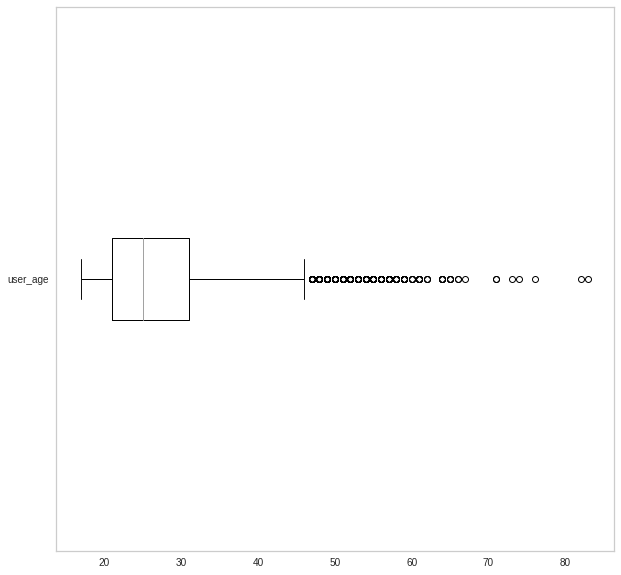

In [ ]:
df_merge.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df_merge['user_age'].quantile(0.25)
Q3 = df_merge['user_age'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 21.0

Q3:
 31.0

IQR:
 10.0

Min:
 6.0

Max:
 46.0


In [ ]:
filter_price_min = df_merge['user_age']<boxplot_min
filter_price_max = df_merge['user_age']>boxplot_max

# Filter data yang price-nya di bawah boxplot_min atau di atas boxplot_max
# Cara bikin kondisinya: BUKAN (filter_price_min ATAU filter_price_max)
# Cara bikin kondisinya: ~ (filter_price_min | filter_price_max)

# Cari yang tidak memenuhi kondisi
# filter_price_min | filter_price_max

df_non_outlier = df_merge

df_non_outlier

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,0.0,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,0.0,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,0.0,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,0.0,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,0.0,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data outlier berada disekitar 4,5% sehingga diputuskan untuk tidak meremove data diluar outlier agar analisis lebih baik

In [ ]:
df_merge = df_non_outlier
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,0.0,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,0.0,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,0.0,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,0.0,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,0.0,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##d. EDA

###Descriptive Statistic

In [ ]:
# Data descriptive string
df_merge[['user_gender', 'user_occupation','user_income_range','referral_code_used','user_income_source']].describe()

,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,8277,8277,8277,8277,8277
unique,2,9,6,2,10
top,Male,Pelajar,< 10 Juta,no_refferal,Gaji
freq,5176,4473,3527,5322,5142


Highlight

Pengguna aktif reksadana menurut data bulan september didominasi user berjenis kelamin pria, lalu status user pelajar, dengan mayoritas pendapatan user <10 juta, sebagian besar masuk tanpa kode referal dan pendapatannya berasal dari gaji

In [ ]:
# Data descriptive numerik
df_merge[['user_age','buy_month','sell_month','AUM_end_value','invested_amount_end_value']].describe()

,user_age,buy_month,sell_month,AUM_end_value,invested_amount_end_value
count,8277.000000,8.277000e+03,8.277000e+03,8.277000e+03,8.277000e+03
mean,27.215658,1.492791e+06,-2.878725e+05,2.580387e+06,2.564284e+06
std,8.562355,1.715047e+07,3.564948e+06,2.546499e+07,2.534350e+07
min,17.000000,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00
25%,21.000000,0.000000e+00,-1.000000e+04,1.180000e+02,0.000000e+00
50%,25.000000,0.000000e+00,0.000000e+00,1.019800e+05,1.000000e+05
75%,31.000000,1.500000e+05,0.000000e+00,5.038080e+05,5.000000e+05
max,83.000000,7.995000e+08,0.000000e+00,1.016171e+09,1.012200e+09


Highligh
1. Rata-rata pengguna app reksadana ini berada diusi 26 tahun
2. Rata-rata buy sendiri terdiri sebanyak 1,3 Juta dengan penjualan rata-rata sebesar 275 ribu, hal ini menandakan komposisi orang yang aktif melakukan top up masih jauh lebih banyak.
3. Rata-rata AUM berada di angka 2,29 juta sedangkan invested 2,27 juta, hal ini mengindikasi bahwa pengguna rata-rata mengalami kenaikan nilai aset

In [ ]:
#,df_merge['sell_month'], df_merge['AUM_end_value'],df_merge['invested_amount_end_value'])

###Source Income

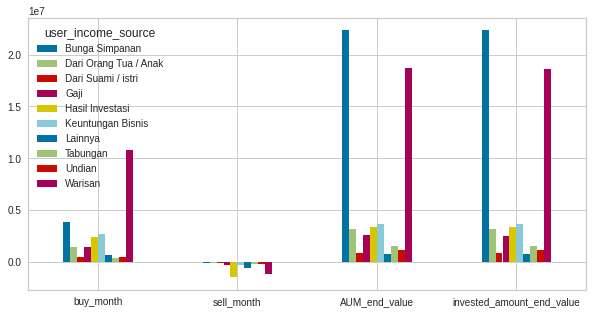

In [ ]:
#Filter
plote = df_merge[['buy_month','sell_month','AUM_end_value','invested_amount_end_value']].groupby([df_merge['user_income_source']]).mean()
plot_trans = plote.transpose()
plot_trans
ax=plot_trans.plot.bar(figsize=(10,5), rot=0)

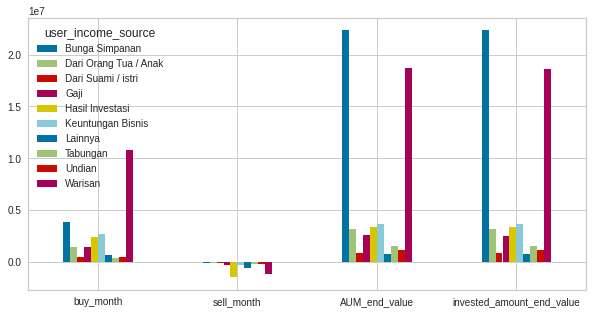

In [ ]:
ax=plot_trans.plot.bar(figsize=(10,5), rot=0)

###Referal code

In [ ]:
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,0.0,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,0.0,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,0.0,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,0.0,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,0.0,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_merge['user_age'].describe()

count    8277.000000
mean       27.215658
std         8.562355
min        17.000000
25%        21.000000
50%        25.000000
75%        31.000000
max        83.000000
Name: user_age, dtype: float64

In [ ]:
#Filter
plote = df_merge[['buy_month','sell_month','AUM_end_value','invested_amount_end_value']].groupby([df_merge['referral_code_used']]).mean()
plot_trans = plote.transpose()
plot_trans_diff = plot_trans.copy()
plot_trans_diff['diff'] = 100*(plot_trans_diff['used referral'] - plot_trans_diff['no_refferal'])/(plot_trans_diff['used referral']+plot_trans_diff['no_refferal'])
plot_trans_diff

referral_code_used,no_refferal,used referral,diff
buy_month,1.542368e+06,1.403500e+06,-4.713983
sell_month,-2.892390e+05,-2.854114e+05,-0.666072
AUM_end_value,2.607314e+06,2.531892e+06,-1.467581
invested_amount_end_value,2.590289e+06,2.517447e+06,-1.426126


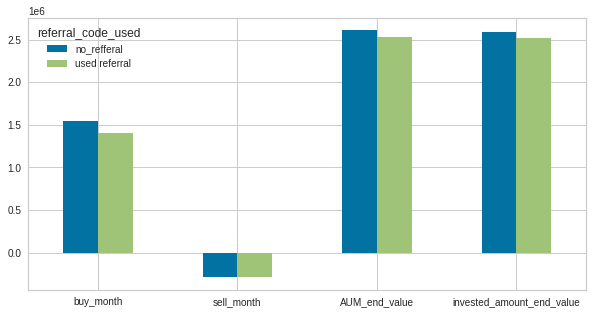

In [ ]:
ax=plot_trans.plot.bar(figsize=(10,5), rot=0)

###User Occupation

In [ ]:
plote = df_merge[['buy_month','sell_month','AUM_end_value','invested_amount_end_value']].groupby([df_merge['user_occupation']]).mean()
plot_trans = plote.transpose()
plot_trans

user_occupation,Guru,IRT,Others,PNS,Pelajar,Pengusaha,Pensiunan,Swasta,TNI/Polisi
buy_month,275544.600000,3.598274e+06,9.709563e+05,3.018452e+06,6.080228e+05,7.609569e+06,1250000.0,2.232366e+06,3.032982e+05
sell_month,-137909.116667,-3.250535e+05,-1.806259e+05,-1.516289e+06,-2.184198e+05,-5.136305e+05,-250000.0,-3.893192e+05,-1.501485e+05
AUM_end_value,514674.533333,7.225916e+06,1.494898e+06,3.481913e+06,1.159575e+06,1.234832e+07,27624517.0,3.614834e+06,1.199475e+06
invested_amount_end_value,509470.566667,7.193877e+06,1.481871e+06,3.448214e+06,1.152015e+06,1.230160e+07,27375000.0,3.587266e+06,1.191230e+06


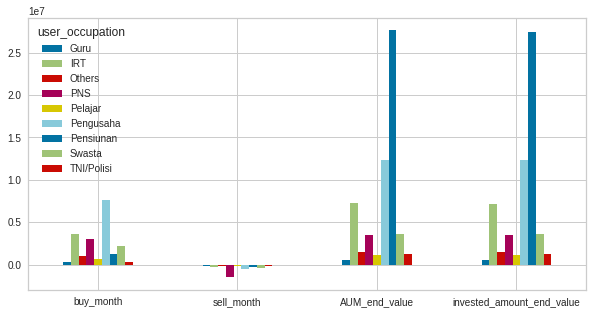

In [ ]:
ax=plot_trans.plot.bar(figsize=(10,5), rot=0)

###Male vs Female Value

In [ ]:
#Filter
female = df_merge.loc[df_merge['user_gender']=='Female']
plote = df_merge[['buy_month','sell_month','AUM_end_value','invested_amount_end_value']].groupby([df_merge['user_gender']]).mean()
plot_trans = plote.transpose()
plot_trans_diff = plot_trans.copy()
plot_trans_diff['diff'] = 100*(plot_trans_diff['Male'] - plot_trans_diff['Female'])/(plot_trans_diff['Male']+plot_trans_diff['Female'])
plot_trans_diff

user_gender,Female,Male,diff
buy_month,1.848462e+06,1.279704e+06,-18.181842
sell_month,-2.707967e+05,-2.981028e+05,4.799798
AUM_end_value,3.463293e+06,2.051428e+06,-25.601748
invested_amount_end_value,3.442388e+06,2.038201e+06,-25.621089


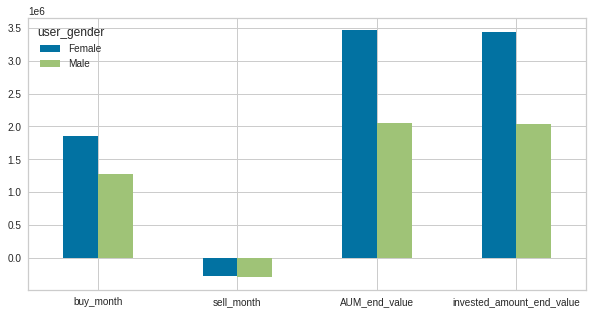

In [ ]:
ax=plot_trans.plot.bar(figsize=(10,5), rot=0)

Insight
Pria mendominasi di setiap jenis transaksi (buy and sell) dan juga kepemilikan dari AUM dan Jumlah Investasi. Meskipun begitu, perbandingan antara pria dan wanita tidaklah begitu besar, sehingga keduanya patut diprioritaskan dalam mengambil keputusan kampanye.

###User occupation demographic

In [ ]:
occupation = df_merge['user_occupation'].groupby([df_merge['user_occupation']]).count().reset_index(name="count")
occupation_trans = occupation.set_index(['user_occupation']).transpose()
occupation_trans 


user_occupation,Guru,IRT,Others,PNS,Pelajar,Pengusaha,Pensiunan,Swasta,TNI/Polisi
count,60,478,928,116,4473,324,4,1868,26


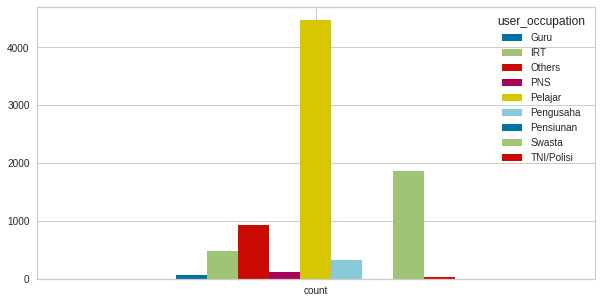

In [ ]:
ax=occupation_trans.plot.bar(figsize=(10,5), rot=0)

Insight
1. Dominasi pelajar merupakan awal yang baik untuk memperkenalkan investasi, namun mengingat pelajar cenderung berpenghasilan lebih kecil dan kurang memberika dampak besar, kita harus mencari tahu juga pekerjaan mana yang memberika dampak terbesar untuk tau approach yang lebih tepat.

###Occupation corelation with UAM and Invested Amount

In [ ]:
occ_effect = df_merge[['AUM_end_value',	'invested_amount_end_value']].groupby(df_merge['user_occupation']).sum()
occ_trans = occ_effect.transpose()
occ_trans

user_occupation,Guru,IRT,Others,PNS,Pelajar,Pengusaha,Pensiunan,Swasta,TNI/Polisi
AUM_end_value,30880472.0,3.453988e+09,1.387266e+09,403901936.0,5.186778e+09,4.000857e+09,110498068.0,6.752510e+09,31186360.0
invested_amount_end_value,30568234.0,3.438673e+09,1.375176e+09,399992784.0,5.152962e+09,3.985718e+09,109500000.0,6.701012e+09,30971993.0


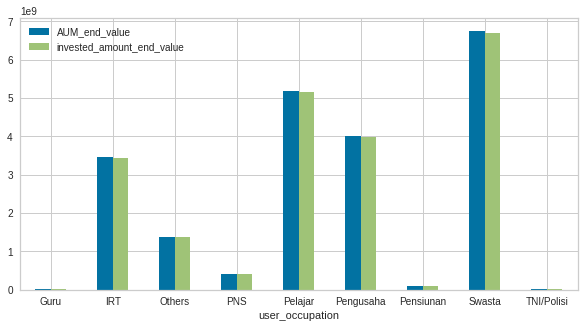

In [ ]:
ax=occ_effect.plot.bar(figsize=(10,5), rot=0)

Insight
1. Pegawai swasta memiliki tingkat asset yang paling besar diantara pekerjaan yang lain, selain itu ternyata pelajar memiliki influence yang cukup besar, dua jenis user ini dapat menjadi fokus kita
2. TNI/Polisi dan Guru memiliki jumlah aset investasi paling sedikit, ini dapat dicoba untuk mengkapanyekan jenis kampanye baru yang akan kita buat kepada pihak-pihak tersebut

user income range

In [ ]:
income = df_merge['user_income_range'].groupby([df_merge['user_income_range']]).count().reset_index(name="count")
income_trans = income.set_index(['user_income_range']).transpose()
#income_trans[['< 10 Juta'],['Rp 10 Juta - 50 Juta'],['Rp 50 Juta - 100 Juta'],['Rp 100 Juta - 500 Juta'],['Rp 500 Juta - 1 Miliar'],['> Rp 1 Miliar']]
income_trans_sort =income_trans[['< 10 Juta','Rp 10 Juta - 50 Juta','> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta','> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar']]
income_trans_sort

user_income_range,< 10 Juta,Rp 10 Juta - 50 Juta,> Rp 50 Juta - 100 Juta,> Rp 100 Juta - 500 Juta,> Rp 500 Juta - 1 Miliar,> Rp 1 Miliar
count,3527,2706,1343,637,48,16


In [ ]:
income_trans.to_dict()

{'< 10 Juta': {'count': 3527},
 '> Rp 1 Miliar': {'count': 16},
 '> Rp 100 Juta - 500 Juta': {'count': 637},
 '> Rp 50 Juta - 100 Juta': {'count': 1343},
 '> Rp 500 Juta - 1 Miliar': {'count': 48},
 'Rp 10 Juta - 50 Juta': {'count': 2706}}

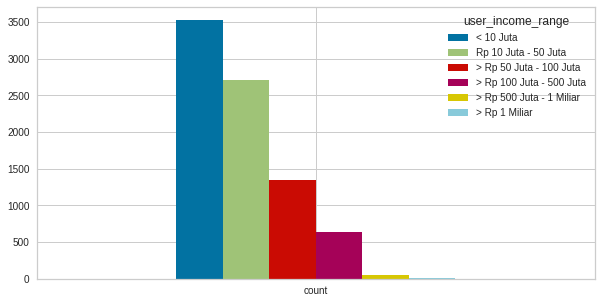

In [ ]:
ax=income_trans_sort.plot.bar(figsize=(10,5), rot=0)

1. Jumlah user terbanyak berada di rentang income <10 juta, ini mengindikasi kita dapat mempertimbangkan bagaimana memberi solusi investasi murah untuk pengembangan aplikasi

###user income corelation with AUM and Invested Amount



In [ ]:
income_effect = df_merge[['AUM_end_value',	'invested_amount_end_value']].groupby(df_merge['user_income_range']).sum()
ie_trans = income_effect.transpose()
ie_trans


user_income_range,< 10 Juta,> Rp 1 Miliar,> Rp 100 Juta - 500 Juta,> Rp 50 Juta - 100 Juta,> Rp 500 Juta - 1 Miliar,Rp 10 Juta - 50 Juta
AUM_end_value,2.714778e+09,335732971.0,7.479118e+09,5.802081e+09,933400404.0,4.092754e+09
invested_amount_end_value,2.695616e+09,332702976.0,7.443960e+09,5.758095e+09,927750869.0,4.066450e+09


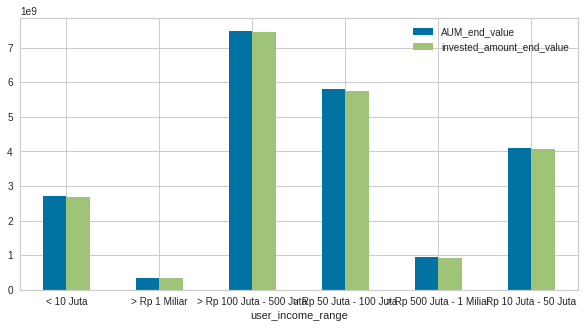

In [ ]:
ax=income_effect.plot.bar(figsize=(10,5), rot=0)

Insight 
1. Walaupun aggota mayoritas didominasi oleh mereka yang berpendapatan < 10 juta, namun anggota dengan total aset terbanyak memiliki range pendapatan pada 50 juta hingga 500 juta, ini memungkinkan kita untuk memfokuskan pengguna dengan range pendapatan demikian untuk melakukan explore lebih pada app baru kita 

###AUM day trend

In [ ]:
df_day_sum.reset_index()

,date,user_id,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM
0,2021-08-04,397084269,2.063762e+07,2.049000e+07,0.0,1.239370e+07,1.239003e+07,0.0,1.029717e+07,1.027830e+07,0.0,1.114070e+07,1.100000e+07,0.0,5.446918e+07
1,2021-08-05,700339011,3.226744e+07,3.195660e+07,1430000.0,3.029522e+07,3.028503e+07,2030000.0,4.425291e+07,4.422437e+07,10410000.0,2.240911e+07,2.230000e+07,0.0,1.292247e+08
2,2021-08-06,1094785912,5.458319e+07,5.435060e+07,3410000.0,8.525646e+07,8.522614e+07,1475000.0,1.004619e+08,1.004562e+08,5870070.0,4.844994e+07,4.690000e+07,9000000.0,2.887515e+08
3,2021-08-09,1473806602,7.969968e+07,8.080949e+07,-1311108.0,2.418925e+08,2.419338e+08,-44750000.0,1.346829e+08,1.347132e+08,3721976.0,8.798171e+07,8.600000e+07,25500000.0,5.442568e+08
4,2021-08-10,2007122724,9.598749e+07,9.758949e+07,4459994.0,9.059726e+07,9.054550e+07,-172287285.0,1.705993e+08,1.705992e+08,4300000.0,1.310054e+08,1.322000e+08,100000.0,4.881894e+08
5,2021-08-11,3427389807,2.309407e+08,2.316865e+08,18365006.0,4.473488e+08,4.472541e+08,260445127.0,7.163308e+08,7.161998e+08,5430030.0,6.047047e+08,6.160428e+08,2500000.0,1.999325e+09
6,2021-08-12,3427389807,2.302781e+08,2.289720e+08,-2714538.0,4.424841e+08,4.422875e+08,-4966640.0,7.106463e+08,7.105495e+08,-5650326.0,6.062125e+08,6.160428e+08,0.0,1.989621e+09
7,2021-08-13,3867398354,2.788296e+08,2.765650e+08,24018000.0,5.536786e+08,5.533848e+08,90855285.0,1.008808e+09,1.008954e+09,261164970.0,6.860631e+08,7.011428e+08,20000000.0,2.527380e+09
8,2021-08-16,4699461128,3.383378e+08,3.374793e+08,13253028.0,5.992457e+08,5.987589e+08,12020135.0,1.544018e+09,1.543272e+09,409974390.0,7.317335e+08,7.632428e+08,8100000.0,3.213335e+09
9,2021-08-17,5125681603,3.726786e+08,3.720593e+08,9740067.0,6.390812e+08,6.385872e+08,6629334.0,1.729757e+09,1.728854e+09,10641108.0,7.379067e+08,7.694428e+08,6000000.0,3.479424e+09


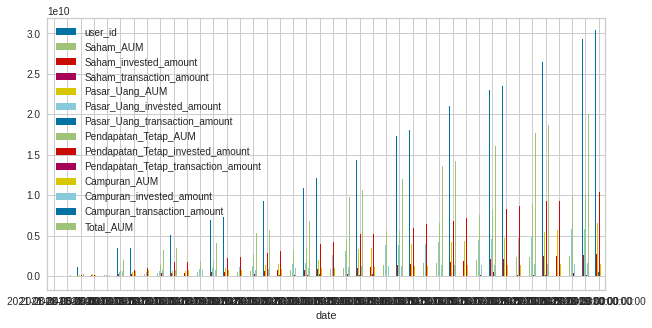

In [ ]:
ax=df_day_sum.plot.bar(figsize=(10,5), rot=0)

Insight
1. Terlihat darid harian jumlah AUM dari setiap user meningkat setiap harinya selama bulan September. Ini mengindikasi adanya perkembangan positif dari aset pengguna

###AUM vs registration date

In [ ]:
df_merge['registration_month'] = df_merge['registration_import_datetime'].dt.strftime('%Y %m')
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value,registration_month
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0,2021 08
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0,2021 08
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0,2021 08
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0,2021 08
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0,2021 09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0,2021 08
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08


In [ ]:
df_merge['registration_month'].value_counts()

2021 08    4198
2021 09    4079
Name: registration_month, dtype: int64

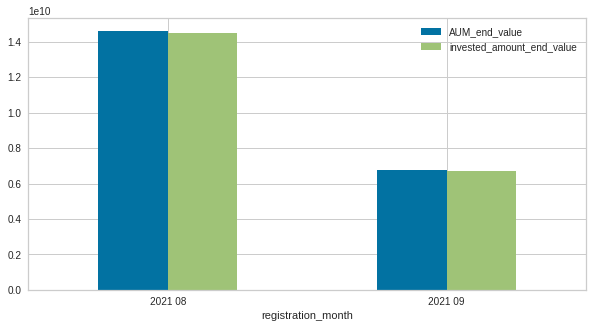

In [ ]:
regis_effect = df_merge[['AUM_end_value',	'invested_amount_end_value']].groupby(df_merge['registration_month']).sum()
ie_trans = regis_effect.transpose()
ie_trans
ax=regis_effect.plot.bar(figsize=(10,5), rot=0)

##e. Clustering

In [ ]:
#table
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value,registration_month
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0,2021 08
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0,2021 08
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0,2021 08
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0,2021 08
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0,2021 09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0,2021 08
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08


In [ ]:
for i in df_merge.columns:
  unique_data = df_merge[i].value_counts()
  print(unique_data,'\n')

3816789    1
3837417    1
3785540    1
3264403    1
2113804    1
          ..
2075425    1
3830466    1
3809663    1
3796212    1
3881981    1
Name: user_id, Length: 8277, dtype: int64 

2021-09-17 14:10:39    5
2021-09-05 15:12:38    5
2021-08-10 10:55:26    5
2021-08-05 10:18:13    5
2021-09-01 19:28:19    5
                      ..
2021-08-31 23:28:52    1
2021-08-31 09:41:34    1
2021-08-20 02:26:21    1
2021-08-26 20:47:45    1
2021-08-11 17:33:05    1
Name: registration_import_datetime, Length: 6581, dtype: int64 

Male      5176
Female    3101
Name: user_gender, dtype: int64 

21    693
20    614
23    554
22    549
24    514
19    503
25    458
18    443
26    419
27    362
28    350
29    328
30    254
31    229
32    190
35    163
33    161
34    140
36    135
17    134
37    107
42     94
38     88
40     76
39     75
41     70
43     56
44     55
46     49
49     49
48     47
45     41
47     39
51     34
52     31
54     30
50     28
53     21
56     16
57     15
55     14

Dalam penentuan variable untuk clustering, diperlukan pemilahan lebih lanjut. Pada pengerjaan kali ini akan didrop beberapa tabel yang penulis anggap kurang relevan, diantaranya :
1. user_id, karena clustering tidak memerlukan user id
2. registration_import_datetime dan registration_month karena data hanya terdiri dari 2 bulan, dan dirasa kurang relevan untuk mengcluster costumer bedasarkan perbedaan 1 bulan saja
3. referral_code_used, karena perbedaan aset dan transaksi tidak sampai 10%, juga dirasa jumlah refferal code lebih cocok untuk analysis keberhasilan campaign
4. Tabel investment, nilai investment tidak berbeda jauh dengan AUM, oleh karena itu nilai AUM dipilih untuk merepresentasikan aset pengguna

###Delete unnecessary variable

In [ ]:
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value,registration_month
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,270673.0,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0,2021 08
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0,2021 08
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0,2021 08
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0,2021 08
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,107322.0,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0,2021 09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,95113.0,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0,2021 08
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08


In [ ]:
    def f(age):
      if age >= 17 and age <=25 : return '17-25'
      elif age >= 26 and age <= 36 : return '26-36'
      elif age >= 37 and age <= 47 : return '37-47'
      elif age >= 48 and age <= 60 : return '48-60'
      else : return '>60'

    df_merge['user_age_category'] = df_merge.apply(lambda x: f(x['user_age']), axis=1)
    df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value,registration_month,user_age_category
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,270000.0,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0,2021 08,48-60
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,3230000.0,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0,2021 08,37-47
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,50000.0,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0,2021 08,48-60
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0,2021 08,48-60
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,110431.0,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0,2021 09,48-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Lainnya,-100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08,48-60
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,-100000.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08,48-60
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,95000.0,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0,2021 08,48-60
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,-100000.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021 08,48-60


In [ ]:
df_merge_clean = df_merge.drop(columns=['date','registration_import_datetime','referral_code_used','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount','invested_amount_end_value','registration_month','Saham_invested_amount'])
df_merge_clean

,user_id,user_gender,user_age,user_occupation,user_income_range,user_income_source,nett_month,buy_month,sell_month,Saham_AUM,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_transaction_amount,Total_AUM,AUM_end_value,user_age_category
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,100000.0,100000.0,0.0,297141.0,0.0,40235.0,0.0,270673.0,0.0,0.0,0.0,608049.0,608049.0,48-60
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,Gaji,8500000.0,8500000.0,0.0,9232900.0,0.0,1354013.0,0.0,3229577.0,0.0,0.0,0.0,13816490.0,13816490.0,37-47
2,3049927,Male,53,Swasta,< 10 Juta,Gaji,149000.0,149000.0,0.0,41545.0,0.0,9997.0,0.0,49925.0,0.0,910285.0,149000.0,1011752.0,1011752.0,48-60
3,3836491,Male,59,Others,< 10 Juta,Lainnya,0.0,0.0,0.0,0.0,0.0,10012.0,0.0,0.0,0.0,0.0,0.0,10012.0,10012.0,48-60
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,Gaji,-889569.0,1000000.0,-1889569.0,0.0,0.0,0.0,0.0,107322.0,0.0,0.0,0.0,107322.0,107322.0,48-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Lainnya,-100000.0,350000.0,-450000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48-60
8273,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,Keuntungan Bisnis,-100000.0,25000.0,-125000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48-60
8274,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Gaji,240000.0,240000.0,0.0,208469.0,0.0,130676.0,0.0,95113.0,0.0,0.0,0.0,434258.0,434258.0,48-60
8275,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,Gaji,-100000.0,150000.0,-250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48-60


###Hapus user yang tidak memiliki AUM

In [ ]:
df_merge= df_merge[df_merge['AUM_end_value']>0]
df_merge_clean= df_merge_clean[df_merge_clean['AUM_end_value']>0]
#df_merge_clean

###Ubah String Variable ke Numerik


In [ ]:
df_merge_clean['user_occupation'].value_counts()

Pelajar       3319
Swasta        1520
Others         594
IRT            346
Pengusaha      253
PNS            107
Guru            52
TNI/Polisi      20
Pensiunan        3
Name: user_occupation, dtype: int64

####Dummies/One-hit-variable
1. user_occupation
2. user_income_source

In [ ]:
df_merge_clean['user_occupation'].value_counts()

Pelajar       3319
Swasta        1520
Others         594
IRT            346
Pengusaha      253
PNS            107
Guru            52
TNI/Polisi      20
Pensiunan        3
Name: user_occupation, dtype: int64

In [ ]:
#perkecil kategori dengan: penisunan -> others; PNS, TNI/Polisi, & Guru -> PNS/Guru 
df_merge_clean.loc[df_merge_clean['user_occupation'] == 'Pensiunan','user_occupation'] = 'Others'
df_merge_clean.loc[df_merge_clean['user_occupation'] == 'TNI/Polisi','user_occupation'] = 'PNS/Guru'
df_merge_clean.loc[df_merge_clean['user_occupation'] == 'Guru','user_occupation'] = 'PNS/Guru'
df_merge_clean.loc[df_merge_clean['user_occupation'] == 'PNS','user_occupation'] = 'PNS/Guru'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_merge_clean['user_income_source'].value_counts()

Gaji                     3925
Undian                    744
Keuntungan Bisnis         637
Dari Orang Tua / Anak     427
Tabungan                  190
Lainnya                   169
Dari Suami / istri         50
Hasil Investasi            44
Warisan                    19
Bunga Simpanan              9
Name: user_income_source, dtype: int64

In [ ]:
user_occ_dumm = pd.get_dummies(df_merge_clean, columns=['user_occupation'], prefix=["user_occ"])
df_merge_clean = df_merge_clean.merge(user_occ_dumm)
in_sour_dumm = pd.get_dummies(df_merge_clean, columns=['user_income_source'], prefix=["in_source"])
df_merge_clean_dum = df_merge_clean.merge(in_sour_dumm)
df_merge_clean_dum

,user_id,user_gender,user_age,user_occupation,user_income_range,user_income_source,nett_month,buy_month,sell_month,Saham_AUM,...,in_source_Bunga Simpanan,in_source_Dari Orang Tua / Anak,in_source_Dari Suami / istri,in_source_Gaji,in_source_Hasil Investasi,in_source_Keuntungan Bisnis,in_source_Lainnya,in_source_Tabungan,in_source_Undian,in_source_Warisan
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,100000.0,100000.0,0.0,297141.0,...,0,0,0,1,0,0,0,0,0,0
1,3802293,Female,47,PNS/Guru,> Rp 500 Juta - 1 Miliar,Gaji,8500000.0,8500000.0,0.0,9232900.0,...,0,0,0,1,0,0,0,0,0,0
2,3049927,Male,53,Swasta,< 10 Juta,Gaji,149000.0,149000.0,0.0,41545.0,...,0,0,0,1,0,0,0,0,0,0
3,3836491,Male,59,Others,< 10 Juta,Lainnya,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,Gaji,-889569.0,1000000.0,-1889569.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,4072318,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Gaji,0.0,0.0,0.0,3930395.0,...,0,0,0,1,0,0,0,0,0,0
6210,3965617,Female,49,IRT,> Rp 100 Juta - 500 Juta,Keuntungan Bisnis,1000000.0,1000000.0,0.0,1170156.0,...,0,0,0,0,0,1,0,0,0,0
6211,3765807,Male,49,Pengusaha,> Rp 500 Juta - 1 Miliar,Keuntungan Bisnis,29790000.0,31040000.0,-1250000.0,21578481.0,...,0,0,0,0,0,1,0,0,0,0
6212,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Gaji,240000.0,240000.0,0.0,208469.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_merge_clean['user_age_category'].value_counts()

17-25    3106
26-36    2190
37-47     639
48-60     262
>60        17
Name: user_age_category, dtype: int64

####Cat_Code
1. user_age
2. user_income_range
3. user_gender

In [ ]:
df_merge_clean['user_income_range'].value_counts()

< 10 Juta                   2508
Rp 10 Juta - 50 Juta        1979
> Rp 50 Juta - 100 Juta     1094
> Rp 100 Juta - 500 Juta     574
> Rp 500 Juta - 1 Miliar      46
> Rp 1 Miliar                 13
Name: user_income_range, dtype: int64

In [ ]:
df_merge_clean.loc[(df_merge_clean['user_income_range']== '> Rp 1 Miliar') | (df_merge_clean['user_income_range']== '> Rp 500 Juta - 1 Miliar'), 'user_income_range'] = '> Rp 500 Juta'


In [ ]:
df_merge_clean['user_income_range'] = df_merge_clean['user_income_range'].astype('category')
df_merge_clean['user_income_range'] = df_merge_clean['user_income_range'].cat.set_categories(['< 10 Juta', 'Rp 10 Juta - 50 Juta', '> Rp 50 Juta - 100 Juta', '> Rp 100 Juta - 500 Juta', '> Rp 500 Juta'], ordered = True)

df_merge_clean['user_income_range_cat'] = df_merge_clean['user_income_range'].cat.codes

In [ ]:
df_merge_clean['user_age_category'] = df_merge_clean['user_age_category'].astype('category')
df_merge_clean['user_age_category'] = df_merge_clean['user_age_category'].cat.set_categories(['17-25', '26-36', '37-47', '48-60', '>60'], ordered = True)

df_merge_clean['user_age_cat'] = df_merge_clean['user_age_category'].cat.codes

In [ ]:
df_merge_clean

,user_id,user_gender,user_age,user_occupation,user_income_range,user_income_source,nett_month,buy_month,sell_month,Saham_AUM,...,AUM_end_value,user_age_category,user_occ_IRT,user_occ_Others,user_occ_PNS/Guru,user_occ_Pelajar,user_occ_Pengusaha,user_occ_Swasta,user_income_range_cat,user_age_cat
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,100000.0,100000.0,0.0,297141.0,...,608049.0,48-60,1,0,0,0,0,0,2,3
1,3802293,Female,47,PNS/Guru,> Rp 500 Juta,Gaji,8500000.0,8500000.0,0.0,9232900.0,...,13816490.0,37-47,0,0,1,0,0,0,4,2
2,3049927,Male,53,Swasta,< 10 Juta,Gaji,149000.0,149000.0,0.0,41545.0,...,1011752.0,48-60,0,0,0,0,0,1,0,3
3,3836491,Male,59,Others,< 10 Juta,Lainnya,0.0,0.0,0.0,0.0,...,10012.0,48-60,0,1,0,0,0,0,0,3
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,Gaji,-889569.0,1000000.0,-1889569.0,0.0,...,107322.0,48-60,0,0,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,4072318,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Gaji,0.0,0.0,0.0,3930395.0,...,7989628.0,48-60,0,0,0,0,0,1,3,3
6210,3965617,Female,49,IRT,> Rp 100 Juta - 500 Juta,Keuntungan Bisnis,1000000.0,1000000.0,0.0,1170156.0,...,2051500.0,48-60,1,0,0,0,0,0,3,3
6211,3765807,Male,49,Pengusaha,> Rp 500 Juta,Keuntungan Bisnis,29790000.0,31040000.0,-1250000.0,21578481.0,...,31478501.0,48-60,0,0,0,0,1,0,4,3
6212,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Gaji,240000.0,240000.0,0.0,208469.0,...,434258.0,48-60,0,0,0,0,0,1,2,3


In [ ]:
df_merge_clean['user_gender'] = df_merge_clean['user_gender'].astype('category')
df_merge_clean['user_gender'] = df_merge_clean['user_gender'].cat.set_categories(['Male','Female'], ordered = True)

df_merge_clean['user_gender_cat'] = df_merge_clean['user_gender'].cat.codes

In [ ]:
df_merge_clean

,user_id,user_gender,user_age,user_occupation,user_income_range,user_income_source,nett_month,buy_month,sell_month,Saham_AUM,...,user_age_category,user_occ_IRT,user_occ_Others,user_occ_PNS/Guru,user_occ_Pelajar,user_occ_Pengusaha,user_occ_Swasta,user_income_range_cat,user_age_cat,user_gender_cat
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,100000.0,100000.0,0.0,297141.0,...,48-60,1,0,0,0,0,0,2,3,1
1,3802293,Female,47,PNS/Guru,> Rp 500 Juta,Gaji,8500000.0,8500000.0,0.0,9232900.0,...,37-47,0,0,1,0,0,0,4,2,1
2,3049927,Male,53,Swasta,< 10 Juta,Gaji,149000.0,149000.0,0.0,41545.0,...,48-60,0,0,0,0,0,1,0,3,0
3,3836491,Male,59,Others,< 10 Juta,Lainnya,0.0,0.0,0.0,0.0,...,48-60,0,1,0,0,0,0,0,3,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,Gaji,-889569.0,1000000.0,-1889569.0,0.0,...,48-60,0,0,0,0,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,4072318,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Gaji,0.0,0.0,0.0,3930395.0,...,48-60,0,0,0,0,0,1,3,3,0
6210,3965617,Female,49,IRT,> Rp 100 Juta - 500 Juta,Keuntungan Bisnis,1000000.0,1000000.0,0.0,1170156.0,...,48-60,1,0,0,0,0,0,3,3,1
6211,3765807,Male,49,Pengusaha,> Rp 500 Juta,Keuntungan Bisnis,29790000.0,31040000.0,-1250000.0,21578481.0,...,48-60,0,0,0,0,1,0,4,3,0
6212,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Gaji,240000.0,240000.0,0.0,208469.0,...,48-60,0,0,0,0,0,1,2,3,0


In [ ]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6213
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   user_id                              6214 non-null   int64   
 1   user_gender                          6214 non-null   category
 2   user_age                             6214 non-null   int64   
 3   user_occupation                      6214 non-null   object  
 4   user_income_range                    6214 non-null   category
 5   user_income_source                   6214 non-null   object  
 6   nett_month                           6214 non-null   float64 
 7   buy_month                            6214 non-null   float64 
 8   sell_month                           6214 non-null   float64 
 9   Saham_AUM                            6214 non-null   float64 
 10  Saham_transaction_amount             6214 non-null   float64 
 11  Pasar_Uang_AUM   

###Final Cluster Table
Remove not numerical column

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
#df_cluster = df_merge_clean.drop(columns=df_merge_clean.columns[25:35])
df_cluster = df_merge_clean.drop(columns=['user_gender_cat','user_age','user_age_category','user_gender','user_occupation','user_income_range','user_income_source'])
df_cluster = df_cluster.drop(columns=['nett_month','buy_month','user_id','sell_month','Total_AUM','Saham_transaction_amount',
                                      'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'])
#df_cluster = df_cluster[df_cluster['AUM_end_value']>0]
#df_cluster = df_cluster.drop(columns=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'])
numerical_column = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','AUM_end_value']
df_cluster = df_cluster.drop(columns=['user_occ_IRT','user_occ_Others','user_occ_PNS/Guru','user_occ_Pelajar','user_occ_Pengusaha','user_occ_Swasta'])	
#'Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM',
df_cluster_ori = df_cluster
df_cluster

,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,AUM_end_value,user_income_range_cat,user_age_cat
0,297141.0,40235.0,270673.0,0.0,608049.0,2,3
1,9232900.0,1354013.0,3229577.0,0.0,13816490.0,4,2
2,41545.0,9997.0,49925.0,910285.0,1011752.0,0,3
3,0.0,10012.0,0.0,0.0,10012.0,0,3
4,0.0,0.0,107322.0,0.0,107322.0,2,3
...,...,...,...,...,...,...,...
6209,3930395.0,500465.0,2576235.0,982533.0,7989628.0,3,3
6210,1170156.0,200587.0,680757.0,0.0,2051500.0,3,3
6211,21578481.0,3031615.0,6868405.0,0.0,31478501.0,4,3
6212,208469.0,130676.0,95113.0,0.0,434258.0,2,3


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6213
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Saham_AUM              6214 non-null   float64
 1   Pasar_Uang_AUM         6214 non-null   float64
 2   Pendapatan_Tetap_AUM   6214 non-null   float64
 3   Campuran_AUM           6214 non-null   float64
 4   AUM_end_value          6214 non-null   float64
 5   user_income_range_cat  6214 non-null   int8   
 6   user_age_cat           6214 non-null   int8   
dtypes: float64(5), int8(2)
memory usage: 303.4 KB


In [ ]:
#Scaler
scaler = MinMaxScaler() #Transform datanya supaya dia berubah dari range asal menjadi range 0-1
#scaler = StandardScaler()
#scaler = RobustScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,AUM_end_value,user_income_range_cat,user_age_cat
0,0.004610,0.000040,0.000276,0.000000,0.000598,2,3
1,0.143247,0.001332,0.003296,0.000000,0.013597,4,2
2,0.000645,0.000010,0.000051,0.003219,0.000996,0,3
3,0.000000,0.000010,0.000000,0.000000,0.000010,0,3
4,0.000000,0.000000,0.000110,0.000000,0.000105,2,3
...,...,...,...,...,...,...,...
6209,0.060980,0.000493,0.002629,0.003474,0.007862,3,3
6210,0.018155,0.000197,0.000695,0.000000,0.002019,3,3
6211,0.334787,0.002983,0.007010,0.000000,0.030977,4,3
6212,0.003234,0.000129,0.000097,0.000000,0.000427,2,3


###Cluster Analysis
  - determine cluster number
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - naming

Let's create a cluster range that make sense for business which from 2 to 10

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs   

1 10817.43101883408
2 5145.410800985031
3 3462.9457361199225
4 2555.9350390388645
5 1952.8702493151359
6 1435.6136009456013
7 1101.501300959932
8 826.3749786987215
9 604.5886704840939
10 444.618526551502


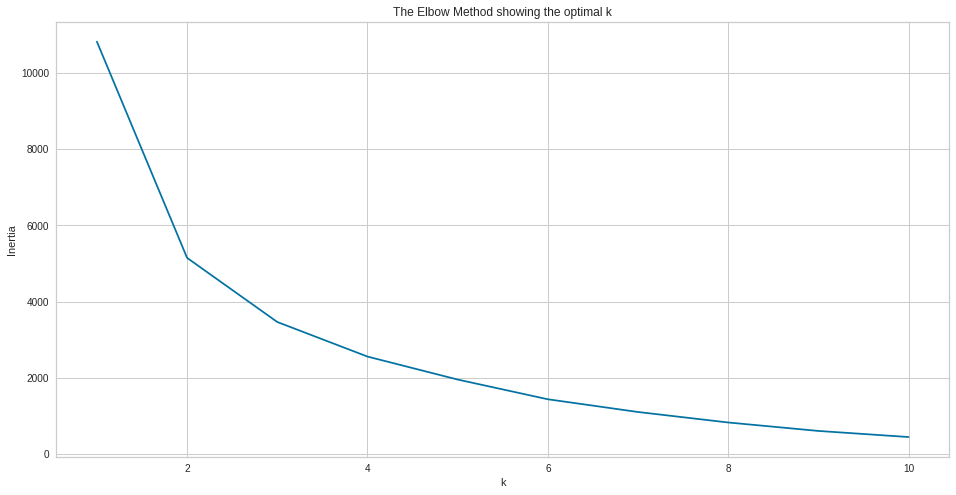

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state = 7)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5287087324911586
For n_clusters = 3 The average silhouette_score is : 0.535400612001209
For n_clusters = 4 The average silhouette_score is : 0.5640440697688007
For n_clusters = 5 The average silhouette_score is : 0.6579251660505767
For n_clusters = 6 The average silhouette_score is : 0.6898155960166847
For n_clusters = 7 The average silhouette_score is : 0.733193928314434
For n_clusters = 8 The average silhouette_score is : 0.8165615605247102
For n_clusters = 9 The average silhouette_score is : 0.8599303112604921


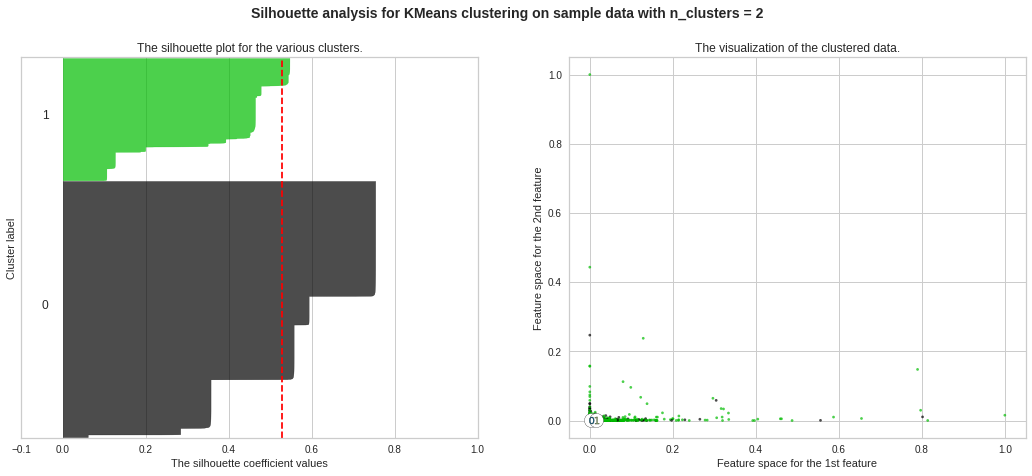

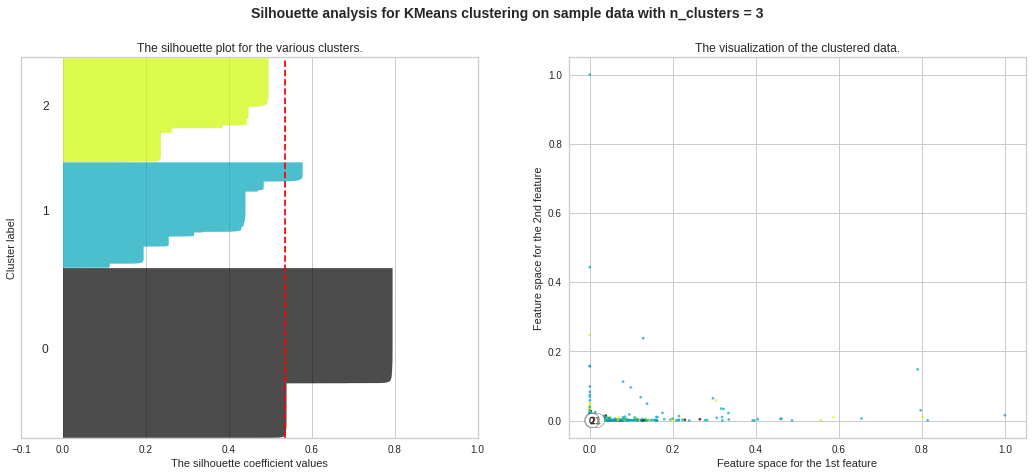

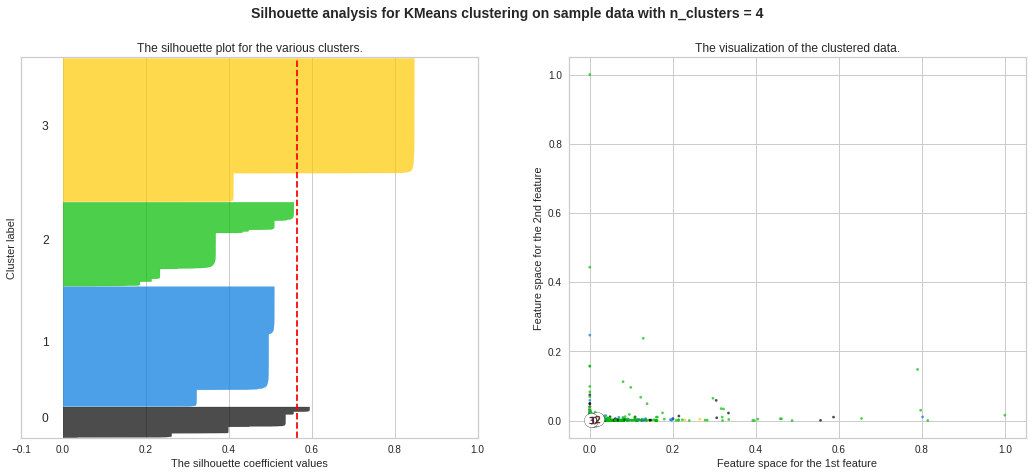

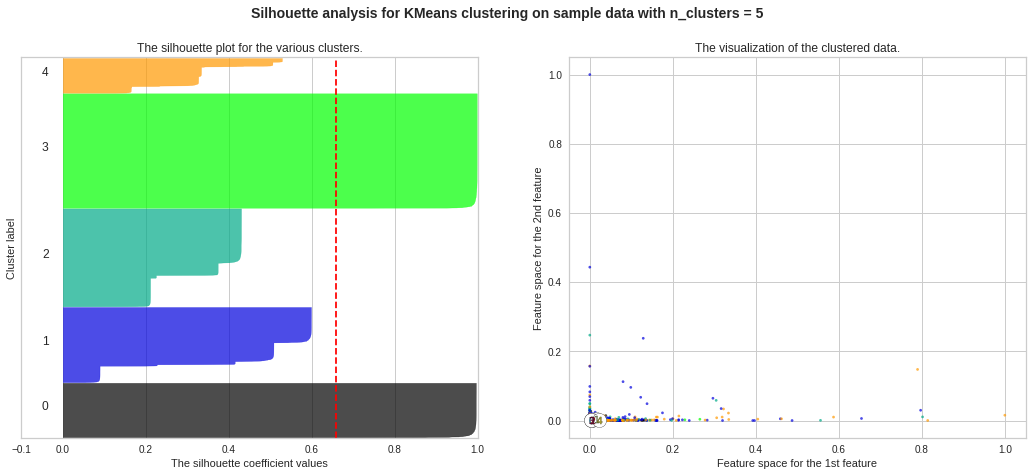

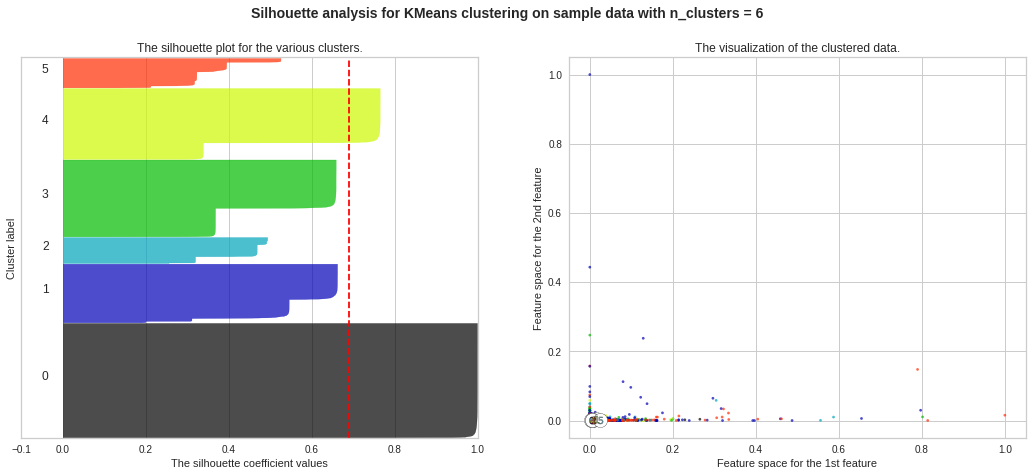

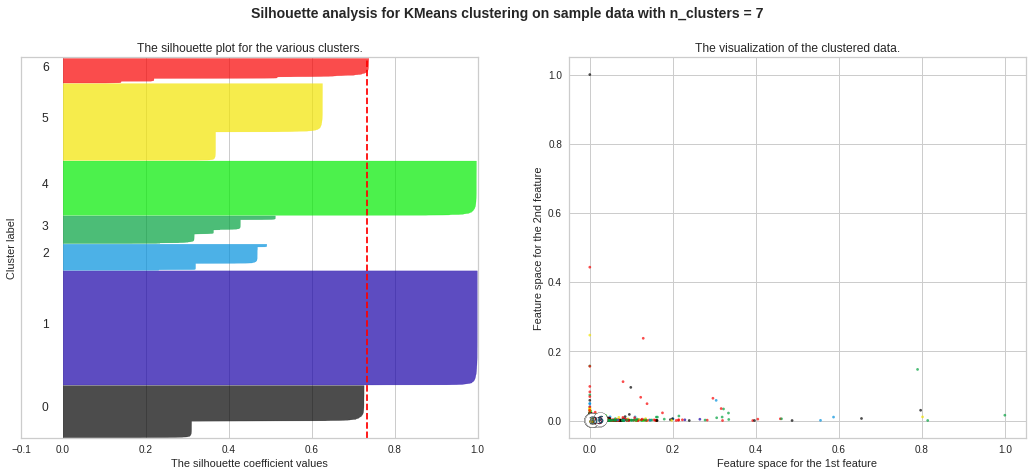

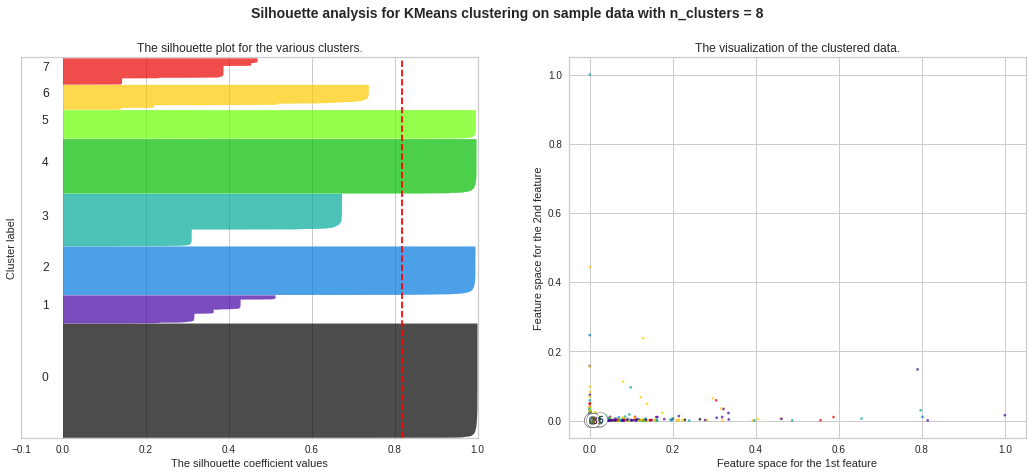

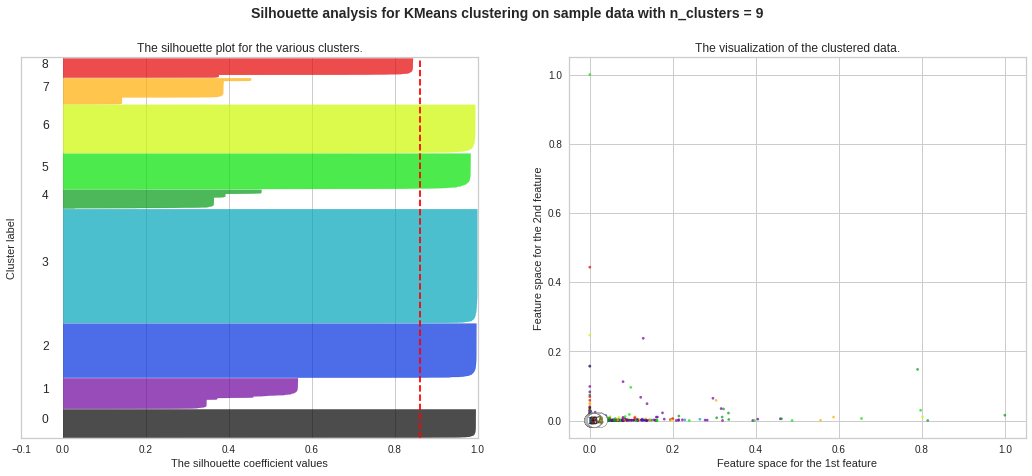

In [ ]:
# silhouette analysis range between 2-5
silhoutte_analysis(df_cluster,list(range(2,10)))

berdasarkan elbow method and silhoutte test yang dilakukan, cluster n=6 memberikan visualisasi dan angka terbaik

In [ ]:
cluster_model = cluster.KMeans(n_clusters=6)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_merge['cluster'] = cluster_label
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 8276
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              6214 non-null   int64         
 1   registration_import_datetime         6214 non-null   datetime64[ns]
 2   user_gender                          6214 non-null   object        
 3   user_age                             6214 non-null   int64         
 4   user_occupation                      6214 non-null   object        
 5   user_income_range                    6214 non-null   object        
 6   referral_code_used                   6214 non-null   object        
 7   user_income_source                   6214 non-null   object        
 8   nett_month                           6214 non-null   float64       
 9   buy_month                            6214 non-null   float64       
 10  sell_month  

<ipython-input-100-594afb45a20c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['cluster'] = cluster_label


In [ ]:
df_merge

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,nett_month,buy_month,...,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,AUM_end_value,invested_amount_end_value,registration_month,user_age_category,cluster
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,100000.0,100000.0,...,0.0,0.0,0.0,0.0,608049.0,608049.0,600000.0,2021 08,48-60,0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000.0,8500000.0,...,0.0,0.0,0.0,0.0,13816490.0,13816490.0,13500000.0,2021 08,37-47,0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no_refferal,Gaji,149000.0,149000.0,...,0.0,910285.0,899000.0,149000.0,1011752.0,1011752.0,1010285.0,2021 08,48-60,4
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0.0,0.0,...,0.0,0.0,0.0,0.0,10012.0,10012.0,10000.0,2021 08,48-60,4
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,-889569.0,1000000.0,...,0.0,0.0,0.0,0.0,107322.0,107322.0,110431.0,2021 09,48-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,4072318,2021-09-16 20:35:32,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no_refferal,Gaji,0.0,0.0,...,0.0,982533.0,1000000.0,0.0,7989628.0,7989628.0,7982533.0,2021 09,48-60,0
8270,3965617,2021-09-03 09:11:34,Female,49,IRT,> Rp 100 Juta - 500 Juta,no_refferal,Keuntungan Bisnis,1000000.0,1000000.0,...,0.0,0.0,0.0,0.0,2051500.0,2051500.0,2000000.0,2021 09,48-60,0
8271,3765807,2021-08-05 23:30:18,Male,49,Pengusaha,> Rp 500 Juta - 1 Miliar,no_refferal,Keuntungan Bisnis,29790000.0,31040000.0,...,0.0,0.0,0.0,0.0,31478501.0,31478501.0,31000000.0,2021 08,48-60,0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no_refferal,Gaji,240000.0,240000.0,...,0.0,0.0,0.0,0.0,434258.0,434258.0,435000.0,2021 08,48-60,0


In [ ]:
df_merge['user_income_range'].groupby([df_merge['cluster'],df_merge['user_income_range']]).count()

cluster  user_income_range       
0        > Rp 1 Miliar                  7
         > Rp 100 Juta - 500 Juta     218
         > Rp 50 Juta - 100 Juta      232
         > Rp 500 Juta - 1 Miliar      30
1        < 10 Juta                   1888
2        Rp 10 Juta - 50 Juta         898
3        > Rp 1 Miliar                  6
         > Rp 100 Juta - 500 Juta     356
         > Rp 50 Juta - 100 Juta      862
         > Rp 500 Juta - 1 Miliar      16
4        < 10 Juta                    150
         Rp 10 Juta - 50 Juta         281
5        < 10 Juta                    470
         Rp 10 Juta - 50 Juta         800
Name: user_income_range, dtype: int64

In [ ]:
df_merge.groupby(['cluster','user_income_range'])['user_id'].count()

cluster  user_income_range       
0        > Rp 1 Miliar                  7
         > Rp 100 Juta - 500 Juta     218
         > Rp 50 Juta - 100 Juta      232
         > Rp 500 Juta - 1 Miliar      30
1        < 10 Juta                   1888
2        Rp 10 Juta - 50 Juta         898
3        > Rp 1 Miliar                  6
         > Rp 100 Juta - 500 Juta     356
         > Rp 50 Juta - 100 Juta      862
         > Rp 500 Juta - 1 Miliar      16
4        < 10 Juta                    150
         Rp 10 Juta - 50 Juta         281
5        < 10 Juta                    470
         Rp 10 Juta - 50 Juta         800
Name: user_id, dtype: int64

In [ ]:
df_merge.groupby('cluster')['user_id'].agg(['count']).reset_index()

,cluster,count
0,0,487
1,1,1888
2,2,898
3,3,1240
4,4,431
5,5,1270


In [ ]:
df_merge[df_merge['Saham_AUM']>0].groupby(['cluster']).agg({'Saham_AUM':'mean'})

,Saham_AUM
cluster,
0,1.901305e+06
1,2.036801e+05
2,3.492561e+05
3,1.257445e+06
4,7.769370e+05
5,4.078591e+05


In [ ]:
df_merge.groupby(['cluster']).agg({'Saham_AUM':'mean'})

,Saham_AUM
cluster,
0,1.569455e+06
1,1.185617e+05
2,2.321892e+05
3,8.933947e+05
4,5.263703e+05
5,2.707285e+05


In [ ]:
df_merge.groupby(['cluster']).agg({'Pendapatan_Tetap_AUM':'mean'})

,Pendapatan_Tetap_AUM
cluster,
0,5.385321e+06
1,1.717683e+05
2,6.168548e+05
3,3.446078e+06
4,2.029909e+06
5,1.426127e+06


In [ ]:
df_merge.groupby(['cluster']).agg({'AUM_end_value':'mean'})

,AUM_end_value
cluster,
0,9.913810e+06
1,5.246818e+05
2,1.223187e+06
3,7.840570e+06
4,3.567621e+06
5,2.504619e+06


#Analysis

In [ ]:
#Ubah 0 ke Nan untuk menghasilkan nilai rata-rata yang lebih representative terhadap angka yang ada saja
df_merge_nan = df_merge.replace(0, np.NaN)

In [ ]:
df_merge_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 8276
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              6214 non-null   int64         
 1   registration_import_datetime         6214 non-null   datetime64[ns]
 2   user_gender                          6214 non-null   object        
 3   user_age                             6214 non-null   int64         
 4   user_occupation                      6214 non-null   object        
 5   user_income_range                    6214 non-null   object        
 6   referral_code_used                   6214 non-null   object        
 7   user_income_source                   6214 non-null   object        
 8   nett_month                           3214 non-null   float64       
 9   buy_month                            3058 non-null   float64       
 10  sell_month  

In [ ]:
df_merge_nan.groupby(['cluster','user_income_range'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','AUM_end_value'].count()

<ipython-input-111-2d9788409e21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merge_nan.groupby(['cluster','user_income_range'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','AUM_end_value'].count()


Saham_AUM  Pasar_Uang_AUM  \
cluster user_income_range                                     
1.0     < 10 Juta                      1099            1485   
2.0     Rp 10 Juta - 50 Juta            597             720   
3.0     > Rp 1 Miliar                     2               4   
        > Rp 100 Juta - 500 Juta        259             281   
        > Rp 50 Juta - 100 Juta         608             688   
        > Rp 500 Juta - 1 Miliar         12              13   
4.0     < 10 Juta                        93             114   
        Rp 10 Juta - 50 Juta            199             219   
5.0     < 10 Juta                       298             361   
        Rp 10 Juta - 50 Juta            545             672   

                                  Pendapatan_Tetap_AUM  Campuran_AUM  \
cluster user_income_range                                              
1.0     < 10 Juta                                 1082            24   
2.0     Rp 10 Juta - 50 Juta                       594            24   
3.0     > Rp 1 Miliar                                4             1   
        > Rp 100 Juta - 500 Juta                   275            24   
        > Rp 50 Juta - 100 Juta                    621            38   
        > Rp 500 Juta - 1 Miliar                    15             1   
4.0     < 10 Juta                                   94             6   
        Rp 10 Juta - 50 Juta                       202            11   
5.0     < 10 Juta                                  315             9   
        Rp 10 Juta - 50 Juta                       557            19   

                                  AUM_end_value  
cluster user_income_range                        
1.0     < 10 Juta                          1888  
2.0     Rp 10 Juta - 50 Juta                898  
3.0     > Rp 1 Miliar                         6  
        > Rp 100 Juta - 500 Juta            356  
        > Rp 50 Juta - 100 Juta             862  
        > Rp 500 Juta - 1 Miliar             16  
4.0     < 10 Juta                           150  
        Rp 10 Juta - 50 Juta                281  
5.0     < 10 Juta                           470  
        Rp 10 Juta - 50 Juta                800

In [ ]:
df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['user_id','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','AUM_end_value'].count().reset_index()

<ipython-input-112-74ee2dda318f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['user_id','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','AUM_end_value'].count().reset_index()


,cluster,user_id,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,AUM_end_value
0,1.0,1888,1099,1485,1082,24,1888
1,2.0,898,597,720,594,24,898
2,3.0,1240,881,986,915,64,1240
3,4.0,431,292,333,296,17,431
4,5.0,1270,843,1033,872,28,1270


In [ ]:
filter_1 = df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'].mean()
filter_1

<ipython-input-113-93b4c770b33a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filter_1 = df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'].mean()


,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
cluster,,,,
1.0,2.036801e+05,2.550893e+05,2.997215e+05,2.652025e+06
2.0,3.492561e+05,3.560460e+05,9.325516e+05,3.317807e+06
3.0,1.257445e+06,3.864431e+06,4.670094e+06,8.297378e+06
4.0,7.769370e+05,1.169329e+06,2.955712e+06,2.735398e+06
5.0,4.078591e+05,8.584238e+05,2.077043e+06,4.968139e+06


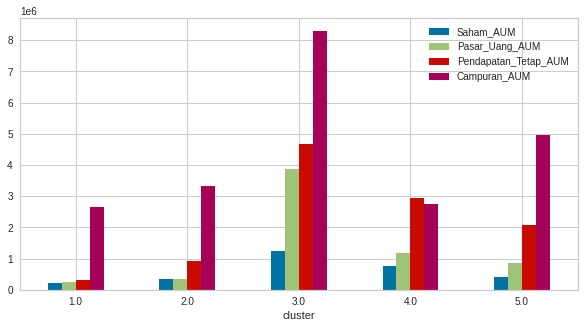

In [ ]:
#Filter
plote = filter_1
plot_trans = plote.transpose()
plot_trans
ax.set_title('Fruit supply by kind and color')
ax=plote.plot.bar(figsize=(10,5), rot=0)

In [ ]:
filter_2 = df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'].count()
filter_2

<ipython-input-115-7827e1a6f7bc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filter_2 = df_merge_nan.sort_values(['AUM_end_value'],ascending=False).groupby(['cluster'])['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'].count()


,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
cluster,,,,
1.0,1099,1485,1082,24
2.0,597,720,594,24
3.0,881,986,915,64
4.0,292,333,296,17
5.0,843,1033,872,28


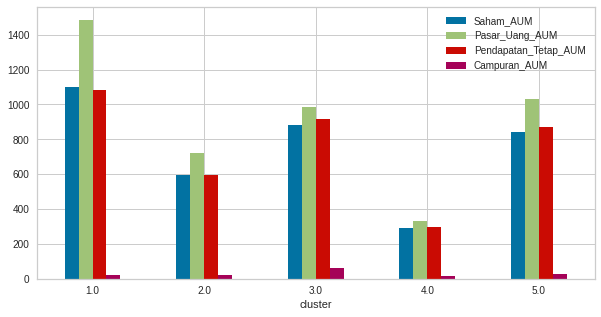

In [ ]:
#Filter
plote = filter_2
plot_trans = plote.transpose()
plot_trans
ax=plote.plot.bar(figsize=(10,5), rot=0)

In [ ]:
filter_3 = df_merge_nan.groupby(['cluster'])[['user_id']].count().reset_index()
filter_3

,cluster,user_id
0,1.0,1888
1,2.0,898
2,3.0,1240
3,4.0,431
4,5.0,1270


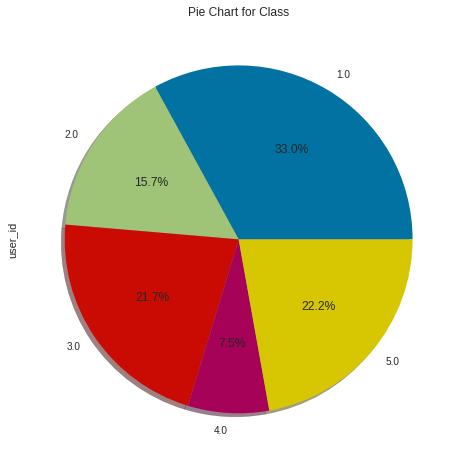

In [ ]:
df_merge_nan.groupby(['cluster'])['user_id'].count().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Class')
plt.show()

In [ ]:
filter_4 = df_merge_nan.groupby(['cluster'])[['AUM_end_value']].mean()
filter_4

,AUM_end_value
cluster,
1.0,5.246818e+05
2.0,1.223187e+06
3.0,7.840570e+06
4.0,3.567621e+06
5.0,2.504619e+06


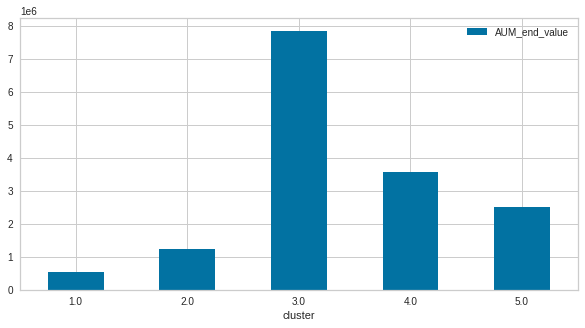

In [ ]:
plote = filter_4
plot_trans = plote.transpose()
plot_trans
ax=plote.plot.bar(figsize=(10,5), rot=0)

In [ ]:
df_merge_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 8276
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              6214 non-null   int64         
 1   registration_import_datetime         6214 non-null   datetime64[ns]
 2   user_gender                          6214 non-null   object        
 3   user_age                             6214 non-null   int64         
 4   user_occupation                      6214 non-null   object        
 5   user_income_range                    6214 non-null   object        
 6   referral_code_used                   6214 non-null   object        
 7   user_income_source                   6214 non-null   object        
 8   nett_month                           3214 non-null   float64       
 9   buy_month                            3058 non-null   float64       
 10  sell_month  

In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==1].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
< 10 Juta,1888


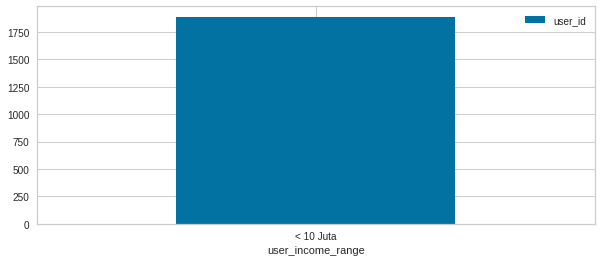

In [ ]:
plote = filter_5
plot_trans = plote.transpose()
plot_trans
ax=plote.plot.bar(figsize=(10,4), rot=0)

income range

In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==1].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
< 10 Juta,1888


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==2].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
Rp 10 Juta - 50 Juta,898


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==3].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
> Rp 1 Miliar,6
> Rp 100 Juta - 500 Juta,356
> Rp 50 Juta - 100 Juta,862
> Rp 500 Juta - 1 Miliar,16


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==4].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
< 10 Juta,150
Rp 10 Juta - 50 Juta,281


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==5].groupby(['user_income_range'])[['user_id']].count()
filter_5

,user_id
user_income_range,
< 10 Juta,470
Rp 10 Juta - 50 Juta,800


age range

In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==1].groupby(['user_age_category'])[['user_id']].count()
filter_5

,user_id
user_age_category,
17-25,1888


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==2].groupby(['user_age_category'])[['user_id']].count()
filter_5

,user_id
user_age_category,
17-25,898


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==3].groupby(['user_age_category'])[['user_id']].count()
filter_5

,user_id
user_age_category,
17-25,320
26-36,920


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==4].groupby(['user_age_category'])[['user_id']].count()
filter_5

,user_id
user_age_category,
37-47,300
48-60,123
>60,8


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==5].groupby(['user_age_category'])[['user_id']].count()
filter_5

,user_id
user_age_category,
26-36,1270


user_occupation

In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==1].groupby(['user_occupation'])[['user_id']].count()
filter_5

,user_id
user_occupation,
Guru,3
IRT,21
Others,139
PNS,2
Pelajar,1653
Pengusaha,9
Swasta,59
TNI/Polisi,2


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==2].groupby(['user_occupation'])[['user_id']].count()
filter_5

,user_id
user_occupation,
Guru,1
IRT,18
Others,90
Pelajar,713
Pengusaha,16
Swasta,58
TNI/Polisi,2


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==3].groupby(['user_occupation'])[['user_id']].count()
filter_5

,user_id
user_occupation,
Guru,5
IRT,52
Others,125
PNS,36
Pelajar,524
Pengusaha,56
Swasta,438
TNI/Polisi,4


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==4].groupby(['user_occupation'])[['user_id']].count()
filter_5

,user_id
user_occupation,
Guru,7
IRT,99
Others,36
PNS,24
Pengusaha,46
Pensiunan,2
Swasta,212
TNI/Polisi,5


In [ ]:
filter_5 = df_merge_nan[df_merge_nan['cluster']==5].groupby(['user_occupation'])[['user_id']].count()
filter_5

,user_id
user_occupation,
Guru,26
IRT,98
Others,162
PNS,7
Pelajar,424
Pengusaha,80
Swasta,468
TNI/Polisi,5
